In [22]:
%reset -f

# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Monday, October 21, 2024, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a Neural Network (MLP). This is similar to a problem you have worked on before but requires the use of a neural network model.

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  



> Good luck, comrade!

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a neural network (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering. So the manual feature engineering is not allowed!
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Enhance performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning training hyperparameters.

> Note: There are no restrictions on the tricks you can use — just achieve the required accuracy. Stack more layers, use AdamW, scheduling, ect. Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How did you achieve the reproducibility of the results?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.
   - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.


In [2]:
# For network architecture visualization, other options are totally fine
from tensorflow.keras.utils import plot_model, set_random_seed
#from torchviz import make_dot

2024-09-27 11:06:20.903448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 11:06:20.924211: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 11:06:20.929430: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 11:06:20.943719: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 11:06:22.325945: W tensorflow/compiler/tf2

In [3]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [4]:
X_train = train.drop(columns=['y', 'split'])
y_train = pd.DataFrame(train['y'])
X_test = test.drop(columns=['y', 'split'])
y_test = pd.DataFrame(test['y'])
y_test = y_test.astype(int).to_numpy()

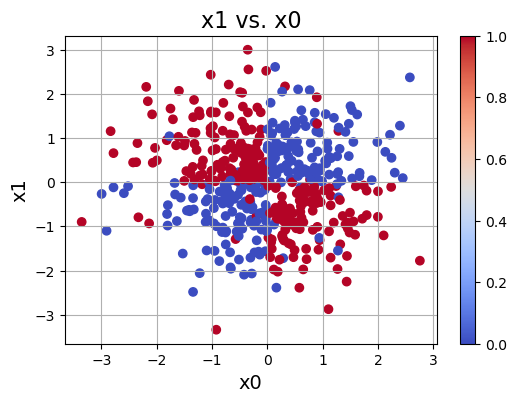

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.config.experimental import enable_op_determinism
set_random_seed(42)
enable_op_determinism()

# Without cosine decay

In [6]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [7]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=100, verbose=0)

2024-09-27 11:06:34.930000: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-09-27 11:06:34.930027: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: michael-pc
2024-09-27 11:06:34.930033: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: michael-pc
2024-09-27 11:06:34.930170: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.107.2
2024-09-27 11:06:34.930191: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.107.2
2024-09-27 11:06:34.930196: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 550.107.2


In [8]:
results = model.evaluate(X_test, y_test)
print("Accuracy without cosine decay: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8955 - loss: 0.3239  
Accuracy without cosine decay:  0.9120000004768372


# With Cosine decay

In [9]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid

cosine_decay_scheduler = CosineDecay(0.001, 1000, warmup_target=0.1, warmup_steps=1000)
optimizer = Adam(learning_rate=cosine_decay_scheduler)


In [10]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

In [11]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9094 - loss: 0.3123  
Accuracy with cosine decay:  0.9179999828338623


We get the same values as without a scheduler, but there is room for tuning in the cosine decay function, we decrease initial learning rate and see what happens.

In [12]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

cosine_decay_scheduler = CosineDecay(0.0001, 1000, warmup_target=0.1, warmup_steps=1000)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

In [13]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

In [14]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay and changing initial learning rate: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9051 - loss: 0.2926  
Accuracy with cosine decay and changing initial learning rate:  0.9179999828338623


Did not see any improvement, let's try adding more layers.

In [15]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

cosine_decay_scheduler = CosineDecay(0.0001, 1000, warmup_target=0.1, warmup_steps=1000)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

In [16]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

In [17]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay and more layers: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5734 - loss: 0.6872  
Accuracy with cosine decay and more layers:  0.5460000038146973


More layers is not always better as the function can overfit if regularization is not added. 

In [18]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_regularizer="l2"))
model.add(Dense(20, activation='relu', kernel_regularizer="l2"))
model.add(Dense(20, activation='relu', kernel_regularizer="l2"))
model.add(Dense(20, activation='relu', kernel_regularizer="l2"))
model.add(Dense(10, activation='relu', kernel_regularizer="l2"))
model.add(Dense(1, activation='sigmoid'))

cosine_decay_scheduler = CosineDecay(0.0001, 1000, warmup_target=0.1, warmup_steps=1000)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

In [19]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

In [20]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay and regularization: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8891 - loss: 0.4412  
Accuracy with cosine decay and regularization:  0.8899999856948853


Regularization improved, but perhaps just remove some layers again and reduce warmup target.

In [21]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_regularizer="l2"))
model.add(Dense(20, activation='relu', kernel_regularizer="l2"))
model.add(Dense(20, activation='relu', kernel_regularizer="l2"))
model.add(Dense(1, activation='sigmoid'))

cosine_decay_scheduler = CosineDecay(0.0001, 1000, warmup_target=0.01, warmup_steps=1000)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

In [22]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay, regularization and changing warmup target: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9096 - loss: 0.4076  
Accuracy with cosine decay, regularization and changing warmup target:  0.921999990940094


Gives a very minor increase in accuracy and we have reached our target!

# 3.a. Reproducibility
We ensure reproducibility through setting a random seed to all initializers, which TensorFlow handily has a function for in tensorflow.keras.utils.set_random_seed(). Or alternatively need to test using tensorflow.config.experimental.enable_op_determinism():

# 3.b. Plotting architecture and decision boundary

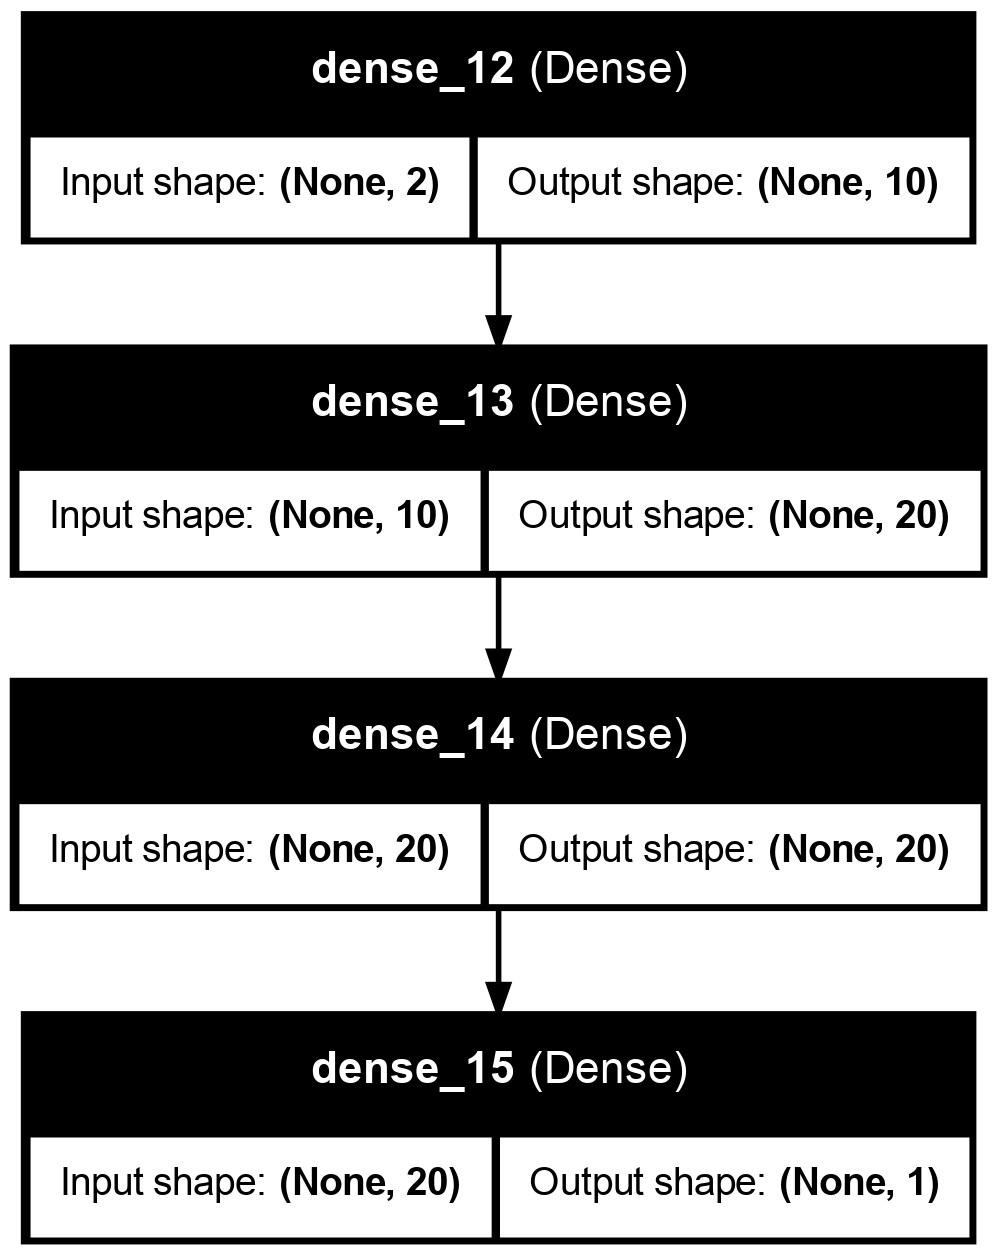

In [20]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

The model just shows the input and output shapes and type of layer used.

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 706us/step


<Axes: >

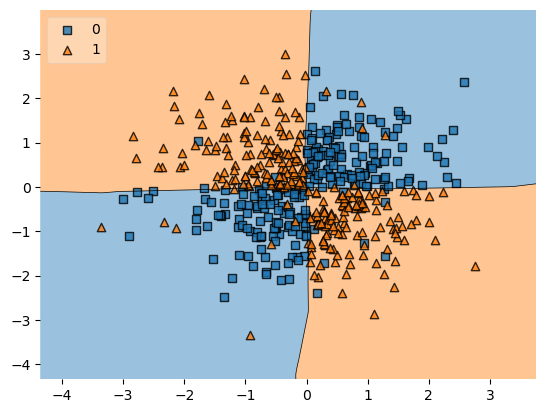

In [36]:
from mlxtend.plotting import plot_decision_regions
y_train = y_train.astype(np.int_)
plot_decision_regions(X=X_train.to_numpy(), y=y_train.to_numpy().reshape(-1), clf=model, legend=2)

We see that the neural network has an accurate decision boundary.

# 3.c. Difference between SGD and Adam optimizers
In their base form they both use a batch gradient descent, only using samples of the dataset to calculate the gradient. Adam adds two additional methods, an adaptive learning rate and a weighted average momentum. The adaptive learning rate is a continous adjustment
of learning rate when training, making it faster to train in most cases. The momentum adds an addutional term for the gradient from the last epoch. Essentially, if the training is optimizing well, the momentum would add a velocity to make it continue in the same direction more strongly.
Adam is usually faster to converge, but it has been found that SGD generalize better than adaptive methods. It has also been found that Adam performs better with a manual scheduler. https://arxiv.org/pdf/1712.07628

# 3.d. Visualise learning rate dynamics. Did having a manual scheduler work better?


In [23]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid

cosine_decay_scheduler = CosineDecay(0.0001, 1000, warmup_target=0.01, warmup_steps=1000)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history_manual_scheduler = model.fit(X_train, y_train, epochs=100, verbose=0)


In [25]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay and changing warmup target: ", results[1])
print("Accuracy without cosine decay: ", 0.9120000004768372)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9019 - loss: 0.2909 
Accuracy with cosine decay and changing warmup target:  0.9139999747276306
Accuracy without cosine decay:  0.9120000004768372


Cosine decay improved slightly.

In [26]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
history_adam = model.fit(X_train, y_train, epochs=100, verbose=0)

In [27]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

cosine_decay_scheduler = CosineDecay(0.001, 1000, warmup_target=0.1, warmup_steps=1000)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history_high_warmup = model.fit(X_train, y_train, epochs=100, verbose=0)

It can be observed that having a manual scheduler can work better, but it does require additional tuning to initial learning rate, decay steps, warmup and warmup steps. 

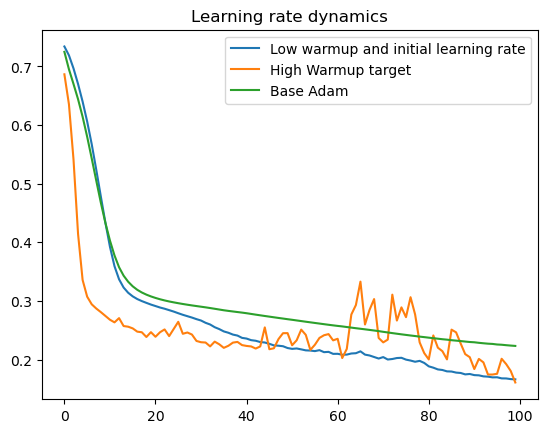

In [28]:
loss_manual = history_manual_scheduler.history['loss']
loss_high_warmup = history_high_warmup.history['loss']
loss_adam = history_adam.history['loss']
epochs = range(100)
plt.plot(epochs, loss_manual, label='Low warmup and initial learning rate')
plt.plot(epochs, loss_high_warmup, label='High Warmup target')
plt.plot(epochs, loss_adam, label='Base Adam')
plt.title('Learning rate dynamics')
plt.legend()
plt.show()

From The plot we can see the learning rate dynamics and that having a tuned manual scheduler gives the best performance. Having a manual scheduler does give better loss in general, but not necessarily a massively improved metric.

# 3.e. Ablation study
We have already tested and seen that having a manual scheduler helps performance. What about changing the optimizer on default scheduler?

In [29]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid


model.compile(optimizer="SGD", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)
results = model.evaluate(X_test, y_test)
print("Accuracy with SGD: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8991 - loss: 0.3662  
Accuracy with SGD:  0.9020000100135803


SGD performs 1 percent worse than adam, having an adaptive learning rate can improve performance. However, SGD can be variable as it depends on the batch it chooses. Let's try two more, RMSProp and AdamW.

In [31]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid


model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)
results = model.evaluate(X_test, y_test)
print("Accuracy with rmsprop: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8946 - loss: 0.3242  
Accuracy with rmsprop:  0.9039999842643738


In [32]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid


model.compile(optimizer="adamw", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)
results = model.evaluate(X_test, y_test)
print("Accuracy with rmsprop: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8966 - loss: 0.3260  
Accuracy with rmsprop:  0.9120000004768372


Of these, SGD performed the worst in accuracy. What about changing the activation function?

In [33]:
model = Sequential()
model.add(Dense(10, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid


model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)
results = model.evaluate(X_test, y_test)
print("Accuracy with rmsprop: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8939 - loss: 0.2984  
Accuracy with rmsprop:  0.9100000262260437


Tanh function does not perform that well compared to ReLU. What about only using sigmoids?

In [34]:
model = Sequential()
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid


model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)
results = model.evaluate(X_test, y_test)
print("Accuracy with rmsprop: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6159 - loss: 0.6734  
Accuracy with rmsprop:  0.6200000047683716


Only having sigmoid does not work well, even though tanh and sigmoid have the same function shape, tanh is centered at the origin rather than 0.5, making it more symmetric.

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts (~30 days * 50 submissions = 1500 total attempts per student).

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.


In [45]:
%reset -f

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

In [71]:
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [72]:
# The dataset is heavy. Applying clustering directly on the dataset is not feasible, I guess. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


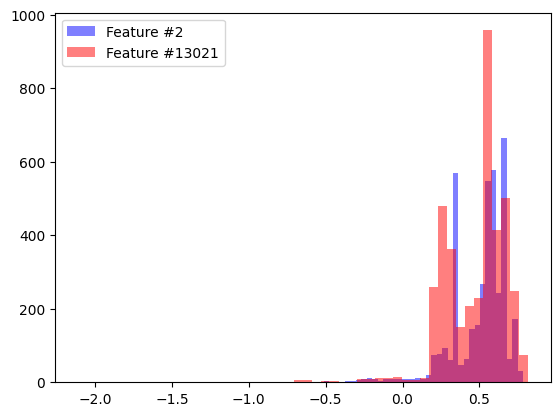

In [73]:
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()

In [75]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7


In [75]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN
import umap

# PCA

In [105]:
pca_80 = PCA(.8)
pca_80.fit(data.iloc[:, 1:])

PCA(n_components=0.8)

In [106]:
pca_90 = PCA(.9)
pca_90.fit(data.iloc[:, 1:])

PCA(n_components=0.9)

PCA is a linear operation used to make orthogonal vectors of the. We want to contain most of the variance in as few principal components as possible. By doing this PCA can be used to filter out noise in features that have little importance and to
be able to use in further analysis. By having fewer features, other dimension reduction methods (usually nonlinear such as TSNE) can be run faster. We run for both 80% and 90% variance explained for experiments.

# TSNE

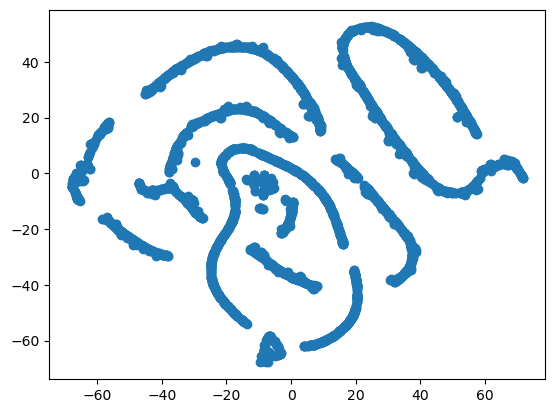

In [114]:
pca_results_80 = pca_80.transform(data.iloc[:, 1:])
tsne_80 = TSNE(n_components=2, perplexity=40, random_state=42, n_jobs=-1)
tsne_results_80 = tsne_80.fit_transform(pca_results_80)
plt.scatter(tsne_results_80[:, 0], tsne_results_80[:, 1])
plt.show()

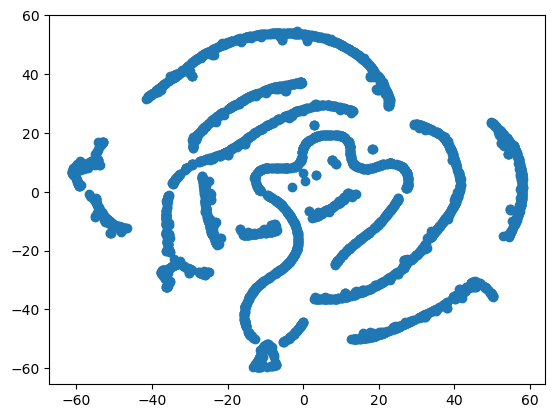

In [117]:
pca_results_90 = pca_90.transform(data.iloc[:, 1:])
tsne_90 = TSNE(n_components=2, perplexity=50, random_state=42, n_jobs=-1)
tsne_results_90 = tsne_90.fit_transform(pca_results_90)
plt.scatter(tsne_results_90[:, 0], tsne_results_90[:, 1])
plt.show()

There is noticeable difference, but TSNE is only used for visualisation. CLustering with TSNE is problematic because what you get out might be artifacts of the algorithm and is heavily dependent on the perplexity hyperparameter and it does not generally model global structure well.

# UMAP

In [80]:
umap_reduction = umap.UMAP(random_state=42)
umap_results = umap_reduction.fit_transform(data.iloc[:, 1:])

CPU times: user 1min 58s, sys: 646 ms, total: 1min 58s
Wall time: 1min 30s


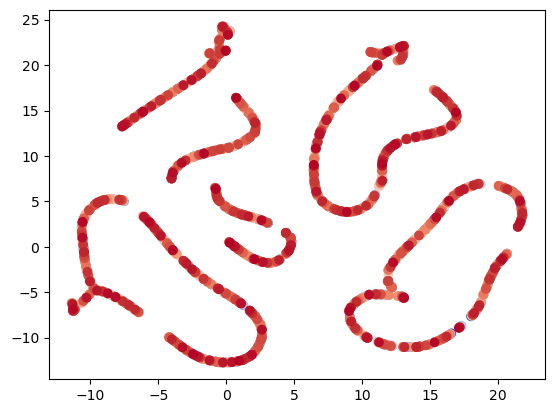

In [81]:
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=data.iloc[:, 0], cmap='coolwarm')
plt.show()

In [125]:
dbscan_model = DBSCAN(eps=1, min_samples=10)
dbscan_results_umap_eps_1 = dbscan_model.fit_predict(umap_results)

In [126]:
dbscan_results_umap_eps_1_df = pd.DataFrame(dbscan_results_umap_eps_1.T) 
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_umap_eps_1_df.reset_index(drop=False, inplace=True)
dbscan_results_umap_eps_1_df.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_umap_eps_1_df.rename(columns={0: 'cluster'}, inplace=True)
dbscan_results_umap_eps_1_df.to_csv('dbscan_results_umap.csv', index=False)

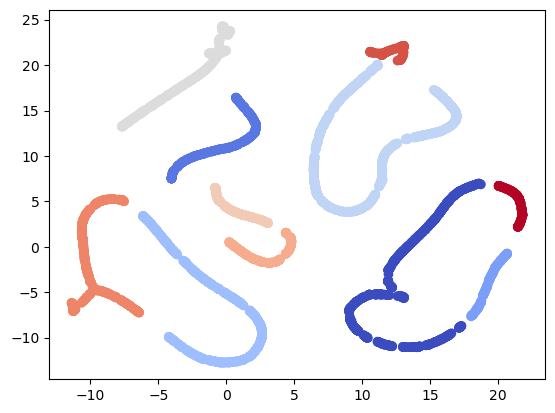

In [83]:
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_results_umap_eps_1, cmap='coolwarm')
plt.show()

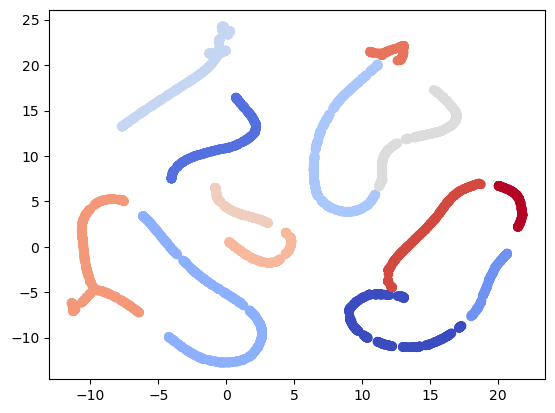

In [104]:
dbscan_model = DBSCAN(eps=0.85, min_samples=10)
dbscan_results_umap = dbscan_model.fit_predict(umap_results)
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_results_umap, cmap='coolwarm')
plt.show()

In [121]:
dbscan_results_umap_df = pd.DataFrame(dbscan_results_umap.T) 
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_umap_df.reset_index(drop=False, inplace=True)
dbscan_results_umap_df.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_umap_df.rename(columns={0: 'cluster'}, inplace=True)
dbscan_results_umap_df.to_csv('dbscan_results_umap.csv', index=False)

In [ ]:
dbscan_model = DBSCAN(eps=0.7, min_samples=5)
dbscan_results_umap = dbscan_model.fit_predict(umap_results)
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_results_umap, cmap='coolwarm')
plt.show()

In [92]:
kmeans_model = KMeans(n_clusters=10, random_state=42)


---

## 🎯 Note: Clustering Accuracy Evaluation


The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation focuses solely on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [56]:
from typing import Any
import numpy as np
import sklearn.metrics
import scipy.optimize

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy


In [57]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

1.0

In [65]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.3333333333333333

In [67]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.5